In [2]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


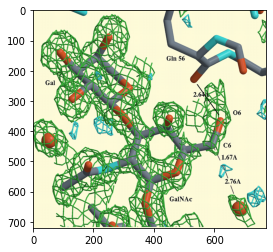

AxesSubplot(0.243007,0.125;0.538986x0.755)
(720, 771)


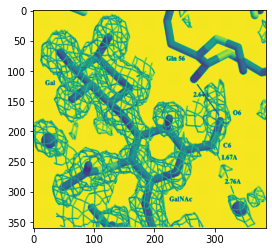

(4, 360, 385)


In [62]:
image1 = rasterio.open("/content/density.tiff")
image1_show = show(image1)

print(image1_show)
print(image1.shape)
upscale_factor = 0.5

with rasterio.open("/content/density.tiff") as dataset:

    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )
image = data
show(image[1])
print(image.shape)

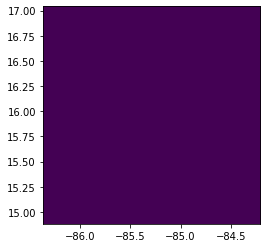

(745, 747)

In [57]:
image = rasterio.open("/content/image_2015-11-08.tiff")
show(image)
image.shape

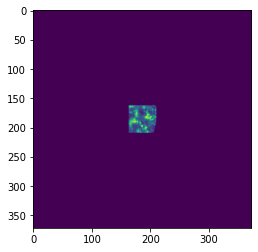

In [50]:
import rasterio
from rasterio.enums import Resampling
from rasterio.plot import show
from matplotlib import pyplot
upscale_factor = 0.5

with rasterio.open("/content/image_2015-11-08.tiff") as dataset:

    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )
image = data
show(data[0])

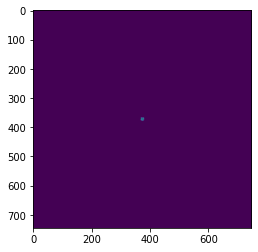

(12, 745, 747)


In [54]:
import numpy as np
import rasterio
from rasterio import Affine as A
from rasterio.warp import reproject, Resampling
from rasterio.plot import show
with rasterio.open('/content/image_2015-11-08.tiff') as src:
    src_transform = src.transform

    # Zoom out by a factor of 2 from the center of the source
    # dataset. The destination transform is the product of the
    # source transform, a translation down and to the right, and
    # a scaling.
    dst_transform = src_transform*A.translation(
        -src.width/0.5, -src.height/0.5)*A.scale(0.5)

    data = src.read()

    kwargs = src.meta
    kwargs['transform'] = dst_transform

    with rasterio.open('/content/image_2015-11-08.tiff', 'w', **kwargs) as dst:

        for i, band in enumerate(data, 1):
            dest = np.zeros_like(band)

            reproject(
                band,
                dest,
                src_transform=src_transform,
                src_crs=src.crs,
                dst_transform=dst_transform,
                dst_crs=src.crs,
                resampling=Resampling.nearest)

            dst.write(dest, indexes=i)
image_shape = data.shape
image_show = show(data[0])
print(image_shape)